In [1]:
import pickle

def load_pickle_files_from_file(file_list_path):
    loaded_objects = []
    with open(file_list_path, 'r') as file_list:
        for line in file_list:
            pickle_file_path = line.strip()
            try:
                with open(pickle_file_path, 'rb') as pickle_file:
                    obj = pickle.load(pickle_file)
                    loaded_objects.append(obj)
            except Exception as e:
                print(f"Error loading file '{pickle_file_path}': {e}")

    return loaded_objects

# Example usage
file_list_path = 'Results/3_qubits_11_pulses.txt'  # Replace with your file path
loaded_objects = load_pickle_files_from_file(file_list_path)

I0000 00:00:1701366043.431667       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [2]:
# Sorting the simulations results
import numpy as np

def sort_simulation_dictionaries(simulation_dictionaries):

    simulation_dictionaries = np.asarray(simulation_dictionaries)

    final_energies = []

    for simulation_data in simulation_dictionaries:

        final_energy = simulation_data['energies'][-1]
        final_energies.append(final_energy)
        # print(final_energy)

    final_energies = np.asarray(final_energies)

    # print(final_energies)

    sorted_indices = np.argsort(final_energies)

    # print(sorted_indices)
    # print(final_energies[sorted_indices])

    sorted_simulation_dictionaries = simulation_dictionaries[sorted_indices]
    # print(sorted_simulation_dictionaries)

    return sorted_simulation_dictionaries


sorted_dictionaries = sort_simulation_dictionaries(loaded_objects)

Text(0, 0.5, 'Loss')

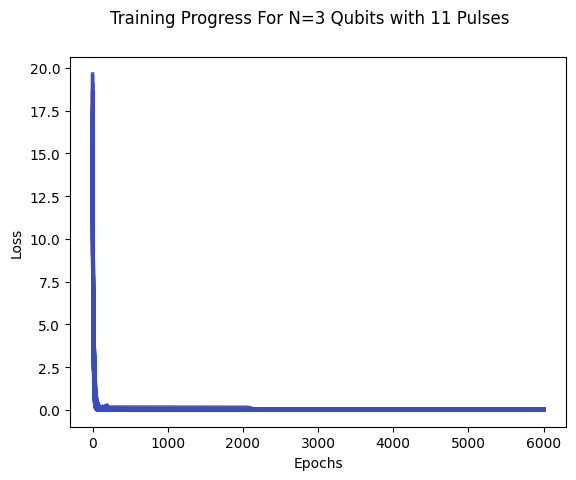

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your list of dictionaries is named 'simulation_list'
simulation_list = sorted_dictionaries  # Your list of 100 dictionaries

# Extracting data
all_energies = [sim['energies'] for sim in simulation_list]
# final_gradient_norms = [np.linalg.norm(sim['final_parameters']) for sim in simulation_list]
min_hessian_eigenvalues = [sim['min_hessian_eigenvalue'] for sim in simulation_list]
max_hessian_eigenvalues = [sim['max_hessian_eigenvalue'] for sim in simulation_list]

fig, ax = plt.subplots()

for sim in simulation_list[:]:

    all_costs_trajectories = sim['energies'][:]

    # fig, ax = plt.subplots()

    ax.plot(all_costs_trajectories.T, linewidth=2.5, color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

    # ax.set_title(f"Training Progress of {trials} Trials for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)
    # ax.set_ylabel("Loss", fontsize=label_fontsize)
    # ax.set_xlabel("Training Iterations", fontsize=label_fontsize)
    # ax.tick_params(labelsize=tick_fontsize)
    # plt.ylim(loss_limits)
    # ax.plot(range(len(all_costs_trajectories[0])), [gs_energy]*len(all_costs_trajectories[0]), linestyle="dashed", color="black", label="True Ground State")
    # ax.scatter([epochs, epochs, epochs], all_costs_trajectories[[0, 1, -1],-1], color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)
    # plt.annotate("gr", xy=(epochs-10,0))


fig.suptitle('Training Progress For N=3 Qubits with 11 Pulses')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')


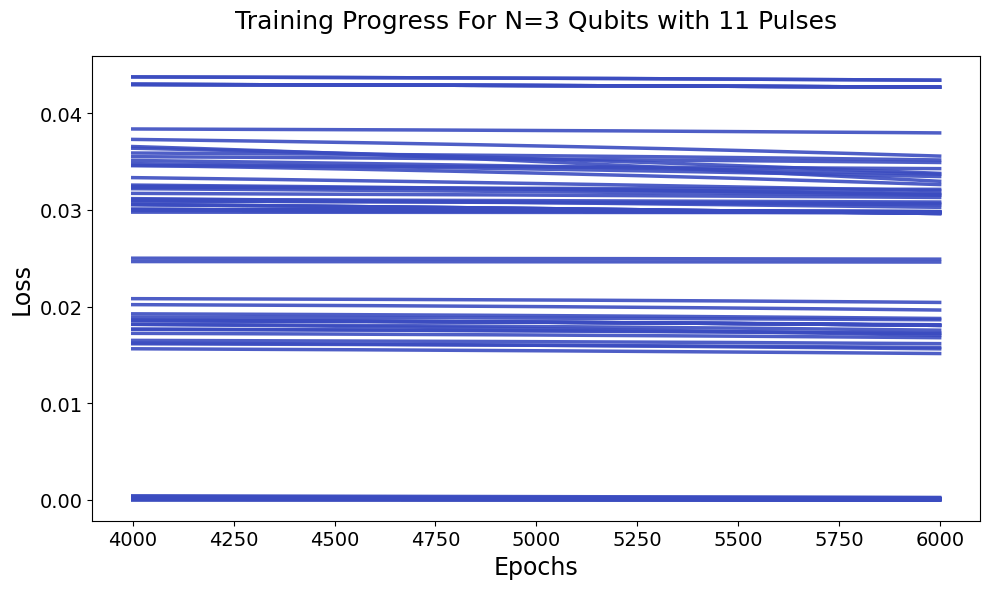

In [21]:
# Assuming your list of dictionaries is named 'simulation_list'
simulation_list = sorted_dictionaries  # Your list of 100 dictionaries

# Extracting data
all_energies = [sim['energies'] for sim in simulation_list]
min_hessian_eigenvalues = [sim['min_hessian_eigenvalue'] for sim in simulation_list]
max_hessian_eigenvalues = [sim['max_hessian_eigenvalue'] for sim in simulation_list]

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size for better visibility

# Font sizes
title_fontsize = 18
label_fontsize = 17
tick_fontsize = 14
X = [i for i in range(4000, 6000)]
# Plot each simulation's energy trajectories
for sim in simulation_list:
    all_costs_trajectories = sim['energies'][4000:]
    ax.plot(X, all_costs_trajectories.T, linewidth=2.5, color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

# Setting the title and labels with increased font sizes
ax.set_title('Training Progress For N=3 Qubits with 11 Pulses', fontsize=title_fontsize, pad=20)
ax.set_xlabel('Epochs', fontsize=label_fontsize)
ax.set_ylabel('Loss', fontsize=label_fontsize)

# Adjusting tick parameters
ax.tick_params(labelsize=tick_fontsize)

# Improving layout
plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Optional: Adding a legend or other annotations if necessary

# Show the plot
plt.show()


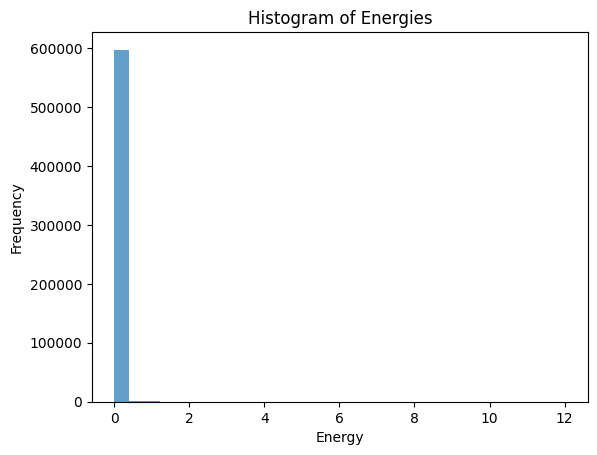

NameError: name 'final_gradient_norms' is not defined

<Figure size 1000x600 with 0 Axes>

In [7]:


# Histogram of energies
# plt.figure(figsize=(10, 6))
plt.hist(np.concatenate(all_energies), bins=30, alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()

# Histogram of the norm of final gradients
plt.figure(figsize=(10, 6))
plt.hist(final_gradient_norms, bins=30, alpha=0.7)
plt.xlabel('Norm of Final Gradients')
plt.ylabel('Frequency')
plt.title('Histogram of Norm of Final Gradients')
plt.show()

# Plot of minimum and maximum Hessian eigenvalues
plt.figure(figsize=(10, 6))
plt.scatter(min_hessian_eigenvalues, max_hessian_eigenvalues, alpha=0.7)
plt.xlabel('Minimum Hessian Eigenvalue')
plt.ylabel('Maximum Hessian Eigenvalue')
plt.title('Minimum and Maximum Hessian Eigenvalues')
plt.show()

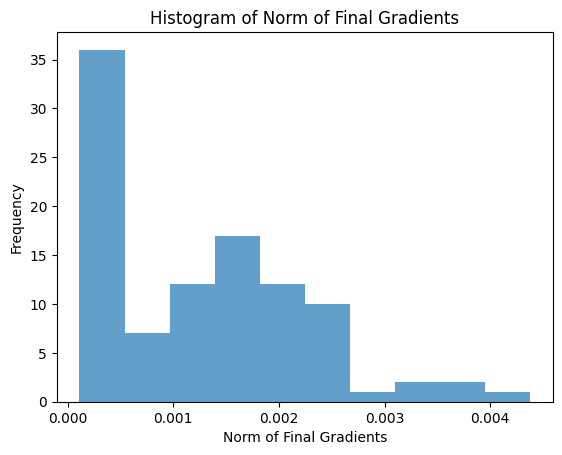

In [11]:
final_gradient_norms = [sim['gradient_norms'][-1] for sim in simulation_list]

# Histogram of the norm of final gradients
# plt.figure(figsize=(10, 6))
plt.hist(final_gradient_norms, bins=10, alpha=0.7)
plt.xlabel('Norm of Final Gradients')
plt.ylabel('Frequency')
plt.title('Histogram of Norm of Final Gradients')
plt.show()

/Users/jorgegarciaponce/Research/Yelin/PerceptronLossLandscapes/.venv/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


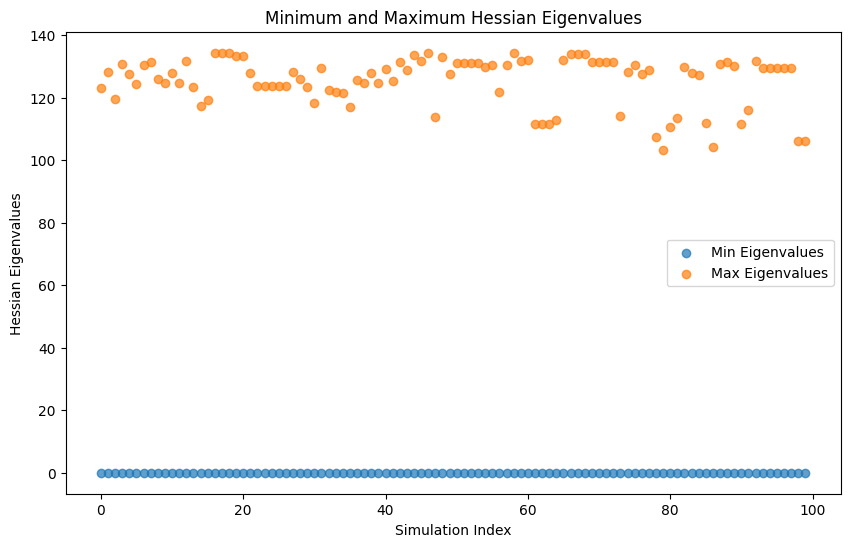

In [12]:
# Plot of minimum and maximum Hessian eigenvalues
plt.figure(figsize=(10, 6))
indices = np.arange(len(simulation_list))  # X-axis values
plt.scatter(indices, min_hessian_eigenvalues, alpha=0.7, label='Min Eigenvalues')
plt.scatter(indices, max_hessian_eigenvalues, alpha=0.7, label='Max Eigenvalues')
plt.xlabel('Simulation Index')
plt.ylabel('Hessian Eigenvalues')
plt.title('Minimum and Maximum Hessian Eigenvalues')
plt.legend()
plt.show()

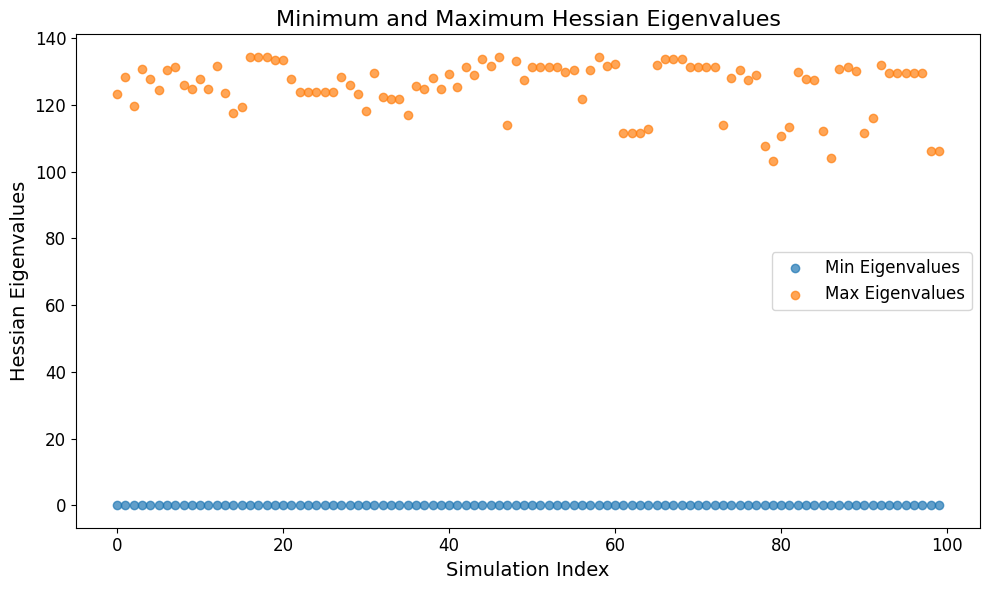

In [13]:
# Assuming 'simulation_list', 'min_hessian_eigenvalues', and 'max_hessian_eigenvalues' are defined

# Font sizes
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
legend_fontsize = 12

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Generate indices for the x-axis
indices = np.arange(len(simulation_list))  

# Plotting
plt.scatter(indices, min_hessian_eigenvalues, alpha=0.7, label='Min Eigenvalues')
plt.scatter(indices, max_hessian_eigenvalues, alpha=0.7, label='Max Eigenvalues')

# Setting labels with increased font sizes
plt.xlabel('Simulation Index', fontsize=label_fontsize)
plt.ylabel('Hessian Eigenvalues', fontsize=label_fontsize)

# Setting title with increased font size
plt.title('Minimum and Maximum Hessian Eigenvalues', fontsize=title_fontsize)

# Adjusting tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Adding a legend with increased font size
plt.legend(fontsize=legend_fontsize)

# Improving layout
plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()


/Users/jorgegarciaponce/Research/Yelin/PerceptronLossLandscapes/.venv/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


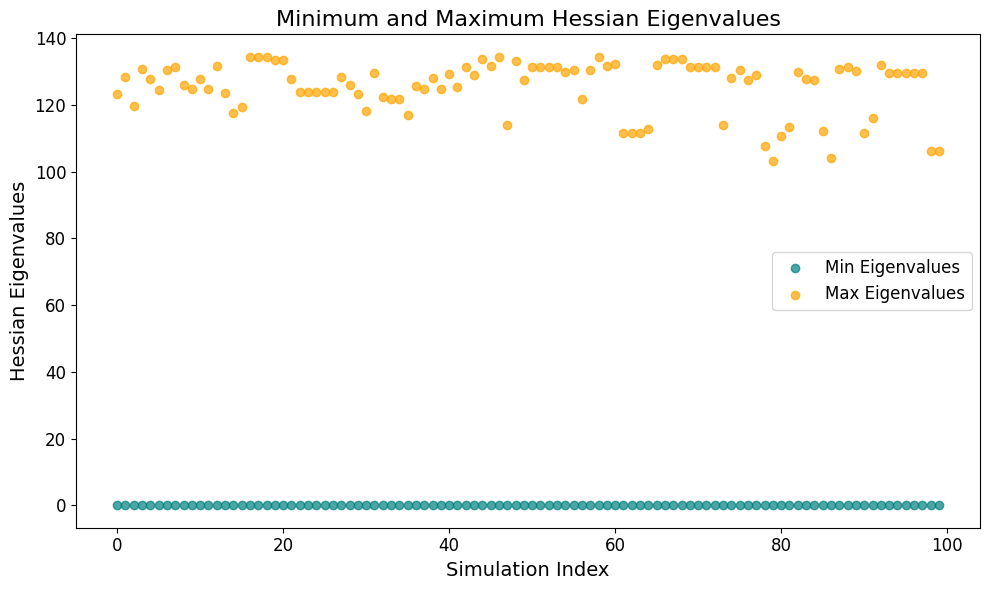

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'simulation_list', 'min_hessian_eigenvalues', and 'max_hessian_eigenvalues' are defined

# Font sizes
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
legend_fontsize = 12

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Generate indices for the x-axis
indices = np.arange(len(simulation_list))

# Colors from the 'coolwarm' colormap
color_min = 'teal' # A cooler color for min eigenvalues
color_max = 'orange' # A warmer color for max eigenvalues

# Plotting with adjusted colors
plt.scatter(indices, min_hessian_eigenvalues, alpha=0.7, label='Min Eigenvalues', color=color_min)
plt.scatter(indices, max_hessian_eigenvalues, alpha=0.7, label='Max Eigenvalues', color=color_max)

# Setting labels with increased font sizes
plt.xlabel('Simulation Index', fontsize=label_fontsize)
plt.ylabel('Hessian Eigenvalues', fontsize=label_fontsize)

# Setting title with increased font size
plt.title('Minimum and Maximum Hessian Eigenvalues', fontsize=title_fontsize)

# Adjusting tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Adding a legend with increased font size
plt.legend(fontsize=legend_fontsize)

# Improving layout
plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()
